# Compare Master Bias Background

- work with Weakly_2023_35
- use jupyter kernel LSST
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/09/19
- update : 2023/09/19



In [1]:
import os
import matplotlib.pyplot as plt
import re

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from astropy.io import fits
from astropy.time import Time

In [2]:
!ls data

background_20230914_collimator~holo4_003_120.csv
background_20230914_collimator~holo4_003_158.csv
background_20230914_empty~holo4_001_141.csv
background_20230914_empty~holo4_001_178.csv
background_20230914_empty~holo4_001_235.csv
background_20230914_empty~holo4_003_156.csv
background_20230914_empty~holo4_003_238.csv


In [3]:
path = "data"

In [4]:
DATE=20230914
files = [ 'background_20230914_collimator~holo4_003_158.csv',
'background_20230914_empty~holo4_001_235.csv',
'background_20230914_empty~holo4_003_238.csv']

In [5]:
filterdispersers = ['collimator~holo4_003','empty~holo4_001','empty~holo4_003']
seqnums = [158,235,238]

In [6]:
N = len(files)

In [7]:
all_df = []
for idx in range(N):
    df = pd.read_csv(os.path.join(path,files[idx]))
    all_df.append(df)

In [8]:
df.columns

Index(['Unnamed: 0', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17',
       'C07', 'C06', 'C05', 'C04', 'C03', 'C02', 'C01', 'C00'],
      dtype='object')

In [9]:
mapampid = [0,1,2,3,4,5,6,7,15,14,13,12,11,10,9,8]
mapname = ['C10' , 'C11' ,'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C07', 'C06', 'C05', 'C04', 'C03', 'C02', 'C01', 'C00'] 

In [10]:
idxf=0
filterdisperser= filterdispersers[idxf]
seqnum = seqnums[idxf]

0 ,0, C10 
1 ,1, C11 
2 ,2, C12 
3 ,3, C13 
4 ,4, C14 
5 ,5, C15 
6 ,6, C16 
7 ,7, C17 
8 ,15, C07 
9 ,14, C06 
10 ,13, C05 
11 ,12, C04 
12 ,11, C03 
13 ,10, C02 
14 ,9, C01 
15 ,8, C00 


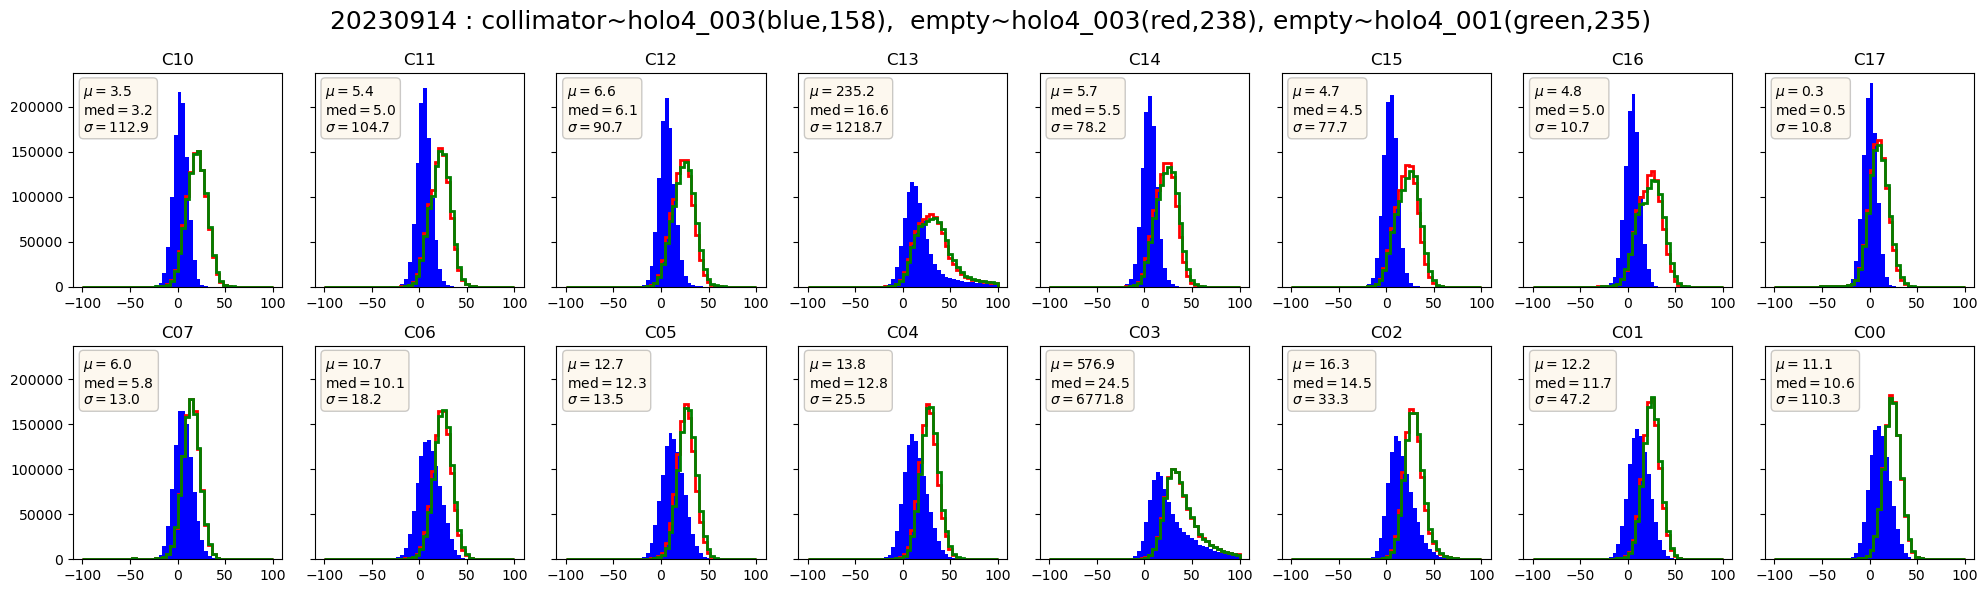

In [11]:
fig, axs = plt.subplots(2, 8,figsize=(20,6),sharey=True)
idx=0
for ax in axs.ravel():
    name = mapname[idx]
 
    data = all_df[idxf][name]
    data2 = all_df[2][name]
    data1 = all_df[1][name]
    ax.hist(data,bins=50,range=(-100,100),facecolor="b")
    ax.hist(data2,bins=50,range=(-100,100),histtype='step',color="r",lw=2)
    ax.hist(data1,bins=50,range=(-100,100),histtype='step',color="g",lw=2)
    x = data
    mu = data.mean()
    median = np.median(data)
    sigma = x.std()
    textstr = '\n'.join((
    r'$\mu=%.1f$' % (mu, ),
    r'$\mathrm{med}=%.1f$' % (median, ),
    r'$\sigma=%.1f$' % (sigma, )))

    ax.set_title(name)  
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top', bbox=props)
    print(f"{idx} ,{mapampid[idx]}, {name} ")
    idx+=1
    
the_title = f"{DATE} : {filterdisperser}(blue,{seqnum}),  {filterdispersers[2]}(red,{seqnums[2]}), {filterdispersers[1]}(green,{seqnums[1]}) "
plt.suptitle(the_title,fontsize=18)
plt.tight_layout()